<a href="https://colab.research.google.com/github/MAHARAJASINGH/PythonBeginner/blob/master/PythonDay15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
##pandas.pydata.   link he is using for this
##input
import pandas as pd
import numpy as np
##table format dataframe
df = pd.DataFrame({'Age':['12',np.nan,'32','21','55'],
        'Height':["5'7","5'8","5'5",np.nan,"5'10"],
                  'Weight':[np.nan,'160','165','155','170'],
                  'Gender':['M','M',np.nan,'F',np.nan],
                  'Salary':[2900,6550000,7840000,6550000,8950000]})
df = pd.DataFrame({'Age':['12',np.nan,'32','21','55'],
        'Height':["5'7","5'8","5'5",np.nan,"5'10"],
                  'Weight':[np.nan,'160','165','155','170'],
                  'Gender':['M','M',np.nan,'F',np.nan],
                  'Salary':[29000,650,7840000,6550000,8950000]})
print(df)
df['s'] = df['Salary'].apply(lambda x: 
                             str(x/1e6).format('{:.2}')+'M' 
                                 if x >= 1e6 
                             else str(x/1e3).format('{:.2}')+'K'
                                 if x > 1e3
                             else str(x).format('{:,}'))
print(df)

   Age Height Weight Gender   Salary
0   12    5'7    NaN      M    29000
1  NaN    5'8    160      M      650
2   32    5'5    165    NaN  7840000
3   21    NaN    155      F  6550000
4   55   5'10    170    NaN  8950000
   Age Height Weight Gender   Salary      s
0   12    5'7    NaN      M    29000  29.0K
1  NaN    5'8    160      M      650    650
2   32    5'5    165    NaN  7840000  7.84M
3   21    NaN    155      F  6550000  6.55M
4   55   5'10    170    NaN  8950000  8.95M


In [13]:
##input
##exploding and vice versa
#explode 
df = pd.DataFrame({'P': [[2, 3, 4], 'fff', [], [4, 5]], 'Q': 2})
print(df)
df = pd.DataFrame({'P': [[2, 3, 4], 'fff', [], [4, 5]], 'Q': 2})
#print(df)
edf = df.explode('P')
print(edf)
lst = edf['P'][0].tolist()
#print(edf['P'][4])

lst2= edf['P'][1]
lst111= edf['P'][2]
lst3 = edf['P'][3].tolist()
print(lst3)
d = {'P':[lst,lst2,lst111,lst3]}
print(d)
xdf = pd.DataFrame({'P':[lst,lst2,lst111,lst3]})
#print(xdf['P'])

           P  Q
0  [2, 3, 4]  2
1        fff  2
2         []  2
3     [4, 5]  2
     P  Q
0    2  2
0    3  2
0    4  2
1  fff  2
2  NaN  2
3    4  2
3    5  2
[4, 5]
{'P': [[2, 3, 4], 'fff', nan, [4, 5]]}


In [10]:
##input
#explode 
df = pd.DataFrame({'P': [[2, 3, 4], 'fff', [], [4, 5]], 'Q': 2})
print(df)
df = pd.DataFrame({'P': [[2, 3, 4], 'fff', [], [4, 5]], 'Q': 2})
#print(df)
edf = df.explode('P')
print(edf)
lst = edf['P'][0].tolist()
#print(edf['P'][4])
lst2= edf['P'][1]
lst3 = edf['P'][3].tolist()
print(lst2)
print(lst3)
d = {'P':[lst,lst2,lst3]}
print(d)
xdf = pd.DataFrame({'P':[lst,lst2,lst3]})
#print(xdf['P'])

           P  Q
0  [2, 3, 4]  2
1        fff  2
2         []  2
3     [4, 5]  2
     P  Q
0    2  2
0    3  2
0    4  2
1  fff  2
2  NaN  2
3    4  2
3    5  2
fff
[4, 5]
{'P': [[2, 3, 4], 'fff', [4, 5]]}


But the interval column in the dataframe is getting converted to a Series
from Shaunak Guha Thakurata (internal) to everyone:
And it doesn't have the overlap function
from Edwin Herald Ponniah (internal) to everyone:
Its not converting, by default if you find the type of a data frame, it gives back Series type only

In [11]:
##input
# data sample
d1 = pd.DataFrame({'Airline':['A','B','C'],'Delays':[[],[1],[1,2]]})
##complex dataframe creation
d2 = (pd.DataFrame(d1['Delays'].values.tolist(), index=d1.index)
        .rename(columns = lambda x: 'Delay{}'.format(x+1)))
print(d1)
print(d2)
df = d1.join(d2)
print (df)
d2 = (pd.DataFrame(d1.pop('Delays').values.tolist(), index=d1.index)
        .rename(columns = lambda x: 'Delay{}'.format(x+1)))
df = d1.join(d2)
print (df)

  Airline  Delays
0       A      []
1       B     [1]
2       C  [1, 2]
   Delay1  Delay2
0     NaN     NaN
1     1.0     NaN
2     1.0     2.0
  Airline  Delays  Delay1  Delay2
0       A      []     NaN     NaN
1       B     [1]     1.0     NaN
2       C  [1, 2]     1.0     2.0
  Airline  Delay1  Delay2
0       A     NaN     NaN
1       B     1.0     NaN
2       C     1.0     2.0


In [23]:
##converting a dataframe column into a series
df = pd.DataFrame([[2, 3], [4, 5]], columns=['p', 'q'])
print(df)
##taking singl column at frst
df_p = df[['p']]
print(df_p)
s_p=df_p.squeeze('columns')
print('in the squeeze format it is')
print(s_p)
##print(s_p['p']) not work as series don't jhave any column rgt now
df[['q']].squeeze('columns')

   p  q
0  2  3
1  4  5
   p
0  2
1  4
in the squeeze format it is
0    2
1    4
Name: p, dtype: int64


0    3
1    5
Name: q, dtype: int64

In [25]:
##setting the index of the series
# importing pandas as pd 
import pandas as pd 
  
# Creating the Series 
sr = pd.Series(['New York', 'Chicago', 'Toronto', 'Lisbon', 'Rio']) 
  
# Create the Index 
index_ = ['City 1', 'City 2', 'City 3', 'City 4', 'City 5']  
  
# set the index 
sr.index = index_ 
  
# Print the series 
print(sr)


City 1    New York
City 2     Chicago
City 3     Toronto
City 4      Lisbon
City 5         Rio
dtype: object


In [27]:
##input
# importing pandas as pd 
import pandas as pd 
  
# Creating the Series 
sr = pd.Series([11, 21, 8, 18, 65, 18, 32, 10, 5, 32, None]) 
  
# Create the Index 
# apply yearly frequency 
index_ = pd.date_range('2010-10-09 08:45', periods = 11, freq ='Y') 
  
# set the index 
sr.index = index_ 
  
# Print the series 
print(sr) 
##it will take x as the values in the series and print true false there
result = sr.apply(lambda x : True if x>30 else False) 
  
print('partition with lambda') 
# Print the result 
print(result)

2010-12-31 08:45:00    11.0
2011-12-31 08:45:00    21.0
2012-12-31 08:45:00     8.0
2013-12-31 08:45:00    18.0
2014-12-31 08:45:00    65.0
2015-12-31 08:45:00    18.0
2016-12-31 08:45:00    32.0
2017-12-31 08:45:00    10.0
2018-12-31 08:45:00     5.0
2019-12-31 08:45:00    32.0
2020-12-31 08:45:00     NaN
Freq: A-DEC, dtype: float64
partition with lambda
2010-12-31 08:45:00    False
2011-12-31 08:45:00    False
2012-12-31 08:45:00    False
2013-12-31 08:45:00    False
2014-12-31 08:45:00     True
2015-12-31 08:45:00    False
2016-12-31 08:45:00     True
2017-12-31 08:45:00    False
2018-12-31 08:45:00    False
2019-12-31 08:45:00     True
2020-12-31 08:45:00    False
Freq: A-DEC, dtype: bool


       Col1      Col2      Col3      Col4
0  0.471435 -1.190976  1.432707 -0.312652
1 -0.720589  0.887163  0.859588 -0.636524
2  0.015696 -2.242685  1.150036  0.991946
3  0.953324 -2.021255 -0.334077  0.002118
4  0.405453  0.289092  1.321158 -1.546906
5 -0.202646 -0.655969  0.193421  0.553439
6  1.318152 -0.469305  0.675554 -1.817027
7 -0.183109  1.058969 -0.397840  0.337438
8  1.047579  1.045938  0.863717 -0.122092
9  0.124713 -0.322795  0.841675  2.390961


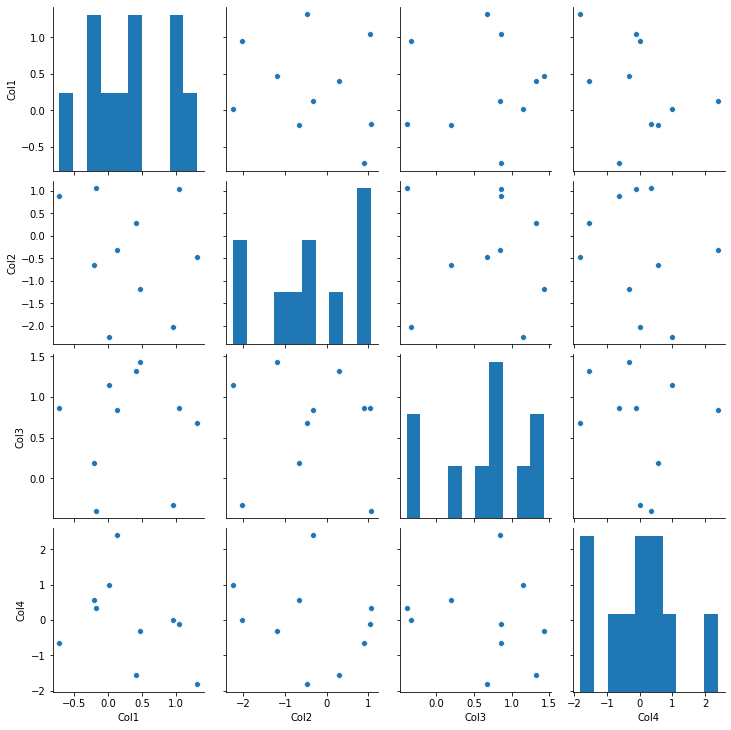

In [33]:
##visualisation of data based on box
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])
print(df)
#boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3','Col4'])
#plt.scatter(df['Col1'],df['Col2'])
#plt.hist(df['Col3'])
sns.pairplot(df)

In [ ]:
##input
import matplotlib.pyplot as plt
from scipy.stats import skew

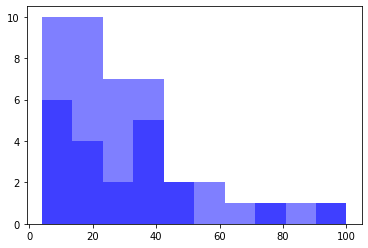

In [34]:
##data with bins
##bins need to understand here
##skewness with data average---distribution of the data
##bin and cut both can be used..
##can use cut as well
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
##what this alpha is doing here
plt.hist(x, facecolor='blue', alpha=0.5)
plt.show()
##bins provided by you or the system will provide

[ 1.3315865   0.71527897 -1.54540029 ...  5.74446677  6.22449239
  8.42055014]


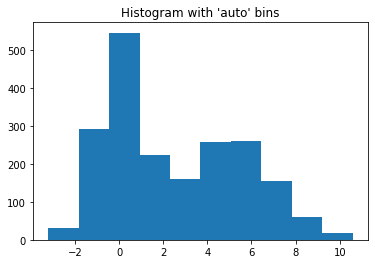

In [35]:
##input
##bins with random values
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
rng.normal(loc=5, scale=2, size=1000)))
print(a)
#plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.hist(a, bins= 10)
#plt.hist(a)
plt.title("Histogram with 'auto' bins")
#Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

time = [0, 1, 2, 3]
position = [0, 100, 200, 300]
plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

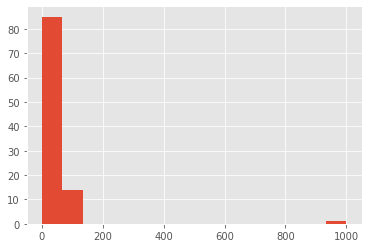

9.041240887877148


In [36]:
##input
import matplotlib.pyplot as plt
from scipy.stats import skew
 
x = [1,1,2,3,3,5,7,8,9,10,
     10,11,11,13,13,15,16,17,18,18,
     18,19,20,21,21,23,24,24,25,25,
     25,25,26,26,26,27,27,27,27,27,
     29,30,30,31,33,34,34,34,35,36,
     36,37,37,38,38,39,40,41,41,42,
     43,44,45,45,46,47,48,48,49,50,
     51,52,53,54,55,55,56,57,58,60,
     61,63,64,65,66,68,70,71,72,74,
     75,77,81,83,84,87,89,90,90,1000
     ]
ht = [10,20,30,40,60,80,100]
wt = [50,60,70,80,35]
plt.style.use('ggplot')
#plt.hist(ht)
#plt.hist(wt)
plt.hist(x, bins=15)
#plt.hist(x)
plt.show()
print(skew(x))

6.0
4.0


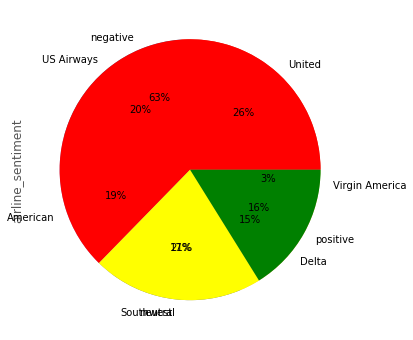

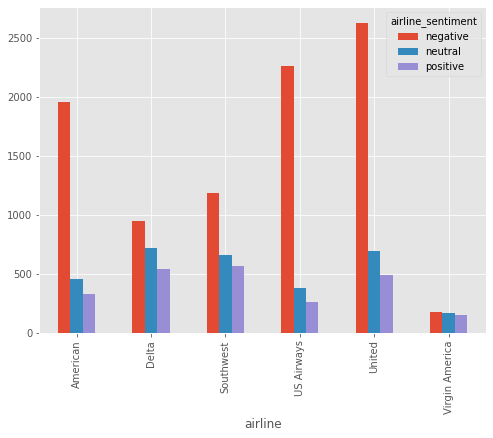

In [42]:
##py chart with python
#input
##pychart for sentiments
##bar chart for sentiments
##printing graphs without overlapping
##use par some function to overcome overlapping
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)
airline_tweets.head()
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

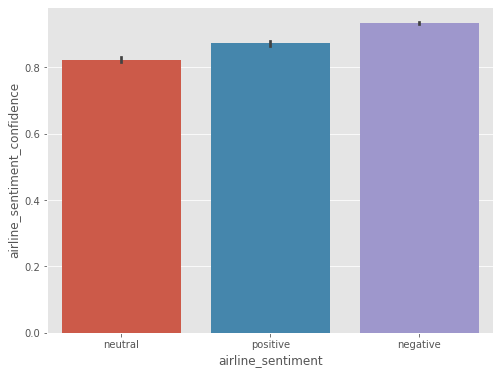

In [43]:
##input
import seaborn as sns
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)

import seaborn as sns
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)
from yograj to everyone:
here i m not understaning that what analysis we are doing while drawing graph
from Joseph Cutler (internal) to everyone:
it is similar to using a pivot table in your excel that helps you present the findings

thanks
from Ramana to everyone:
what is the use of import re function?
from Edwin Herald Ponniah (internal) to everyone:
used for the regex functions
from yograj to everyone:
this is used for regular expression
from Ashutosh to everyone:
what is the significance of doing plot_size[0] = 8??
from Ashutosh to everyone:
in the first pie chart example

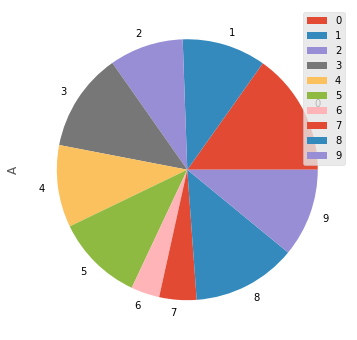

In [45]:
##some g plot is also here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
y = np.random.rand(10,4)
y[:,0]= np.arange(10)
df = pd.DataFrame(y, columns=["X", "A", "B", "C"])
df.plot(x="X", y="A", kind="pie")
#df.plot(x="X", y="B", kind="bar", ax=ax, color="C2")
###ax is for sub plot and it is giving errro here...
#df.plot(x="X", y="C", kind="bar", ax=ax, color="C3")
plt.show()

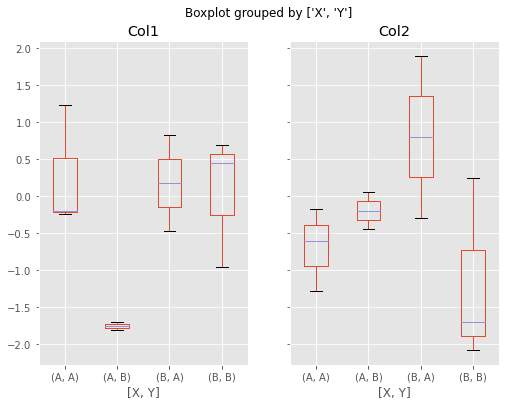

In [46]:
##input
df = pd.DataFrame(np.random.randn(10, 3),
                   columns=['Col1', 'Col2', 'Col3'])
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A',
                      'B', 'B', 'B', 'B', 'B'])
df['Y'] = pd.Series(['A', 'B', 'A', 'B', 'A',
                      'B', 'A', 'B', 'A', 'B'])
boxplot = df.boxplot(column=['Col1', 'Col2'], by=['X', 'Y'])

df = pd.DataFrame(np.random.randn(10, 2),
                   columns=['Col1', 'Col2'])
#print(df)
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A',
                      'B', 'B', 'B', 'B', 'B'])
print(df)
boxplot = df.boxplot(by='X')
from Sharada Lakshmanan (internal) to everyone:
df = pd.DataFrame(np.random.randn(10, 3),
                   columns=['Col1', 'Col2', 'Col3'])
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A',
                      'B', 'B', 'B', 'B', 'B'])
df['Y'] = pd.Series(['A', 'B', 'A', 'B', 'A',
                      'B', 'A', 'B', 'A', 'B'])
boxplot = df.boxplot(column=['Col1', 'Col2'], by=['X', 'Y'])